In [27]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS
import yfinance as yf

In [55]:
# Get price data for PHYSX and GLD from yfinance
pslv = pd.read_excel('excel_data/PSLV.xlsx')
pslv.head()

,Date,Close,NAV
0,2023-01-20,8.14,8.4578
1,2023-01-19,8.14,8.4279
2,2023-01-18,7.98,8.2927
3,2023-01-17,8.15,8.4566
4,2023-01-16,NaN,8.5718


In [56]:
# Replace nan values with the average of the previous and next values
pslv['Close'].fillna((pslv['Close'].shift(1) + pslv['Close'].shift(-1))/2, inplace=True)

In [57]:
# round all the values of close and nav to two decimal places
pslv['Close'] = pslv['Close'].round(2)
pslv['NAV'] = pslv['NAV'].round(2)

# make a new df of only the dates past 2018
pslv = pslv[pslv['Date'] > '2019-01-01']
pslv.head()
# Convert phys to a dictionary
pslv_dict = pslv.to_dict()
print(pslv_dict)

{'Date': {0: Timestamp('2023-01-20 00:00:00'), 1: Timestamp('2023-01-19 00:00:00'), 2: Timestamp('2023-01-18 00:00:00'), 3: Timestamp('2023-01-17 00:00:00'), 4: Timestamp('2023-01-16 00:00:00'), 5: Timestamp('2023-01-13 00:00:00'), 6: Timestamp('2023-01-12 00:00:00'), 7: Timestamp('2023-01-11 00:00:00'), 8: Timestamp('2023-01-10 00:00:00'), 9: Timestamp('2023-01-09 00:00:00'), 10: Timestamp('2023-01-06 00:00:00'), 11: Timestamp('2023-01-05 00:00:00'), 12: Timestamp('2023-01-04 00:00:00'), 13: Timestamp('2023-01-03 00:00:00'), 14: Timestamp('2022-12-30 00:00:00'), 15: Timestamp('2022-12-29 00:00:00'), 16: Timestamp('2022-12-28 00:00:00'), 17: Timestamp('2022-12-27 00:00:00'), 18: Timestamp('2022-12-23 00:00:00'), 19: Timestamp('2022-12-22 00:00:00'), 20: Timestamp('2022-12-21 00:00:00'), 21: Timestamp('2022-12-20 00:00:00'), 22: Timestamp('2022-12-19 00:00:00'), 23: Timestamp('2022-12-16 00:00:00'), 24: Timestamp('2022-12-15 00:00:00'), 25: Timestamp('2022-12-14 00:00:00'), 26: Timestam

<AxesSubplot:title={'center':'PSLV Close and NAV'}>

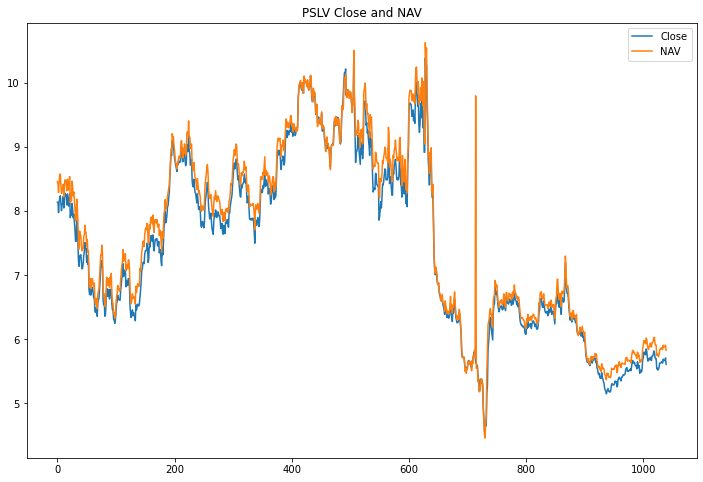

In [58]:
# Show a time series of the close and NAV values for PHYS
pslv[['Close', 'NAV']].plot(figsize=(12, 8), title='PSLV Close and NAV')

<AxesSubplot:title={'center':'PSLV Close and NAV Daily Percent Change'}>

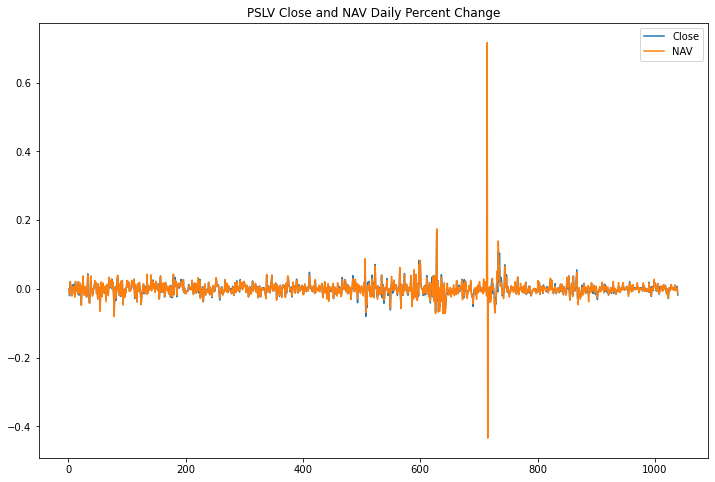

In [59]:
# Plot the daily percent changes against eachother as a time series
pslv[['Close', 'NAV']].pct_change().plot(figsize=(12, 8), title='PSLV Close and NAV Daily Percent Change')

<AxesSubplot:title={'center':'PSLV Close and NAV Daily Percent Change'}, xlabel='Close', ylabel='NAV'>

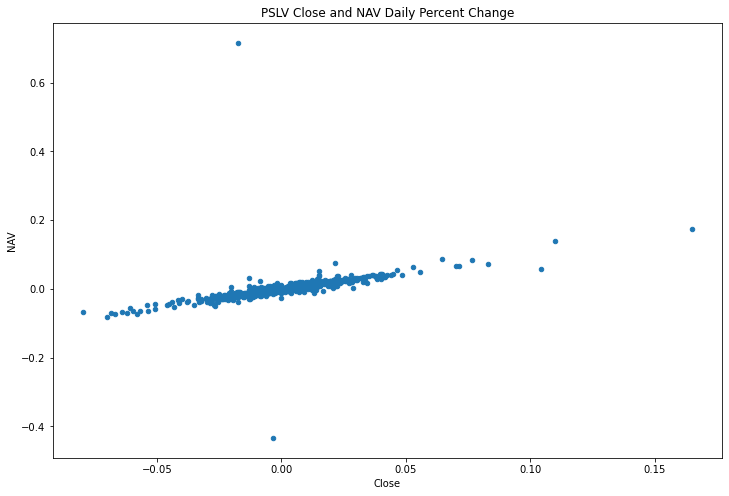

In [60]:
# plot the daily percent changes against eachother as a scatter plot
pslv[['Close', 'NAV']].pct_change().plot.scatter(x='Close', y='NAV', figsize=(12, 8), title='PSLV Close and NAV Daily Percent Change')

<AxesSubplot:title={'center':'PSLV Premium/Discount'}>

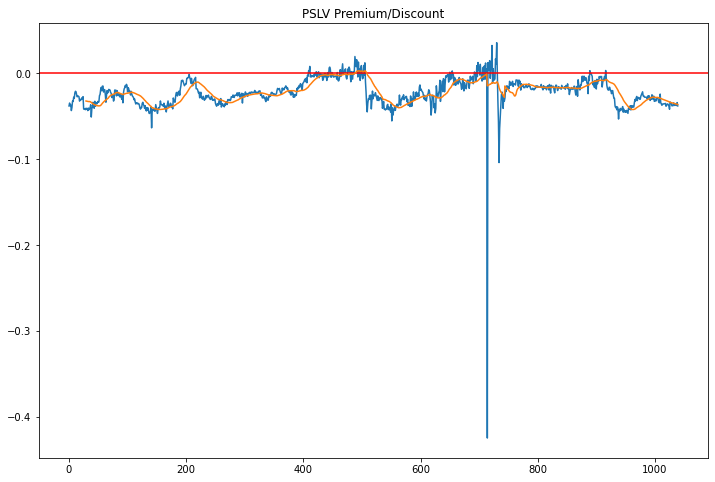

In [61]:
# Plot the premium/discount between the NAV and Close
pmd = pslv['Close'] / pslv['NAV'] - 1
pmd.plot(figsize=(12, 8), title='PSLV Premium/Discount')
plt.axhline(0, color='r')
pmd.rolling(30).mean().plot(figsize=(12, 8), title='PSLV Premium/Discount')  # <-- simple moving average

Determining if the two are cointegrated

In [62]:
df = pslv
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df.drop(['index'], axis=1)
df.head()

,Close,NAV
Date,,
2019-01-02,5.61,5.83
2019-01-03,5.71,5.91
2019-01-04,5.67,5.89
2019-01-07,5.67,5.88
2019-01-08,5.67,5.88


In [64]:
# remove the close column
df = df.drop(['Close'], axis=1)

In [65]:
# print this as a dictionary
df_dict = df.to_dict()
print(df_dict)

{'NAV': {Timestamp('2019-01-02 00:00:00'): 5.83, Timestamp('2019-01-03 00:00:00'): 5.91, Timestamp('2019-01-04 00:00:00'): 5.89, Timestamp('2019-01-07 00:00:00'): 5.88, Timestamp('2019-01-08 00:00:00'): 5.88, Timestamp('2019-01-09 00:00:00'): 5.91, Timestamp('2019-01-10 00:00:00'): 5.84, Timestamp('2019-01-11 00:00:00'): 5.85, Timestamp('2019-01-14 00:00:00'): 5.87, Timestamp('2019-01-15 00:00:00'): 5.85, Timestamp('2019-01-16 00:00:00'): 5.85, Timestamp('2019-01-17 00:00:00'): 5.83, Timestamp('2019-01-18 00:00:00'): 5.76, Timestamp('2019-01-21 00:00:00'): 5.73, Timestamp('2019-01-22 00:00:00'): 5.76, Timestamp('2019-01-23 00:00:00'): 5.77, Timestamp('2019-01-24 00:00:00'): 5.75, Timestamp('2019-01-25 00:00:00'): 5.91, Timestamp('2019-01-28 00:00:00'): 5.91, Timestamp('2019-01-29 00:00:00'): 5.94, Timestamp('2019-01-30 00:00:00'): 6.03, Timestamp('2019-01-31 00:00:00'): 6.03, Timestamp('2019-02-01 00:00:00'): 5.97, Timestamp('2019-02-04 00:00:00'): 5.95, Timestamp('2019-02-05 00:00:00'

In [50]:
print(f'Number of days in dataset: {len(df)}')

Number of days in dataset: 1040


In [51]:
# Segregate out data only for the years 2018 - 2019
df_1 = df['2018-01-01':'2019-12-31']
df_1.head()

,Close,NAV
Date,,
2019-01-02,5.61,5.83
2019-01-03,5.71,5.91
2019-01-04,5.67,5.89
2019-01-07,5.67,5.88
2019-01-08,5.67,5.88


In [52]:
# how many nan values
df_1.isna().sum()

Close    0
NAV      0
dtype: int64

In [53]:
# Fill the nan values with the average of the previous day and next day's price
df_1['Close'].fillna(method='ffill', inplace=True)
df_1['Close'].fillna(method='bfill', inplace=True)

/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_50193/1405125688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Close'].fillna(method='ffill', inplace=True)
/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_50193/1405125688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Close'].fillna(method='bfill', inplace=True)


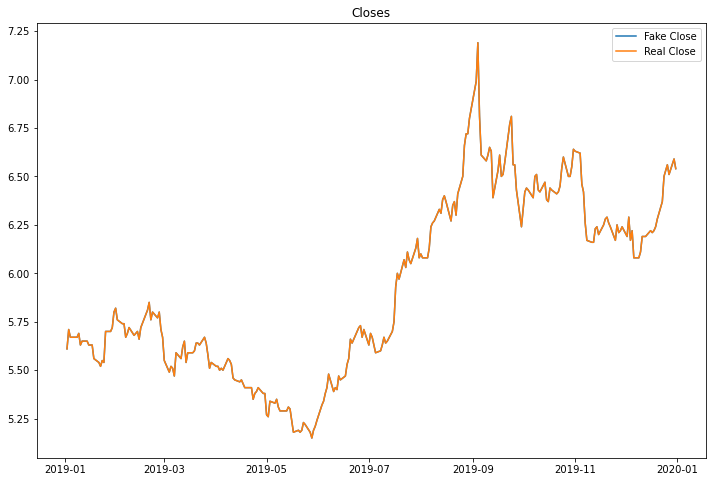

In [54]:
# Plot the df_1 close values against the pslv close values for the dates in df_1
plt.figure(figsize=(12, 8))
plt.plot(df_1['Close'], label='Fake Close')
# Plot the close values from the phys df for the same dates in df_1
plt.plot(pslv['Close'].loc['2018-01-01':'2019-12-31'], label='Real Close')
plt.title('Closes')
plt.legend()
plt.show()

In [14]:
print(f'Number of days in dataset: {len(df_1)}')

Number of days in dataset: 512


In [15]:
trainset = np.arange(0, 252)
df_1 = df_1.iloc[trainset, :]  # use only first year of data for training

In [16]:
# coint_t: Cointegration test statistic (t-statistic) for the null hypothesis that the two series are not cointegrated.
# pvalue: MacKinnon's approximate p-value
# crit_value: Critical values for the test statistic at the 1 %, 5 %, and 10 % levels.
coint_t, pvalue, crit_value = coint(
    df_1['Close'], df_1['NAV']
    )
print(f'cointegration test statistic: {coint_t}')
print(f'p-value: {pvalue}')
print(f'critical values: {crit_value}')

cointegration test statistic: -3.423926281497277
p-value: 0.03976163988372645
critical values: [-3.94060523 -3.36058133 -3.06139039]


hedge ratio: 0.9713456697450762


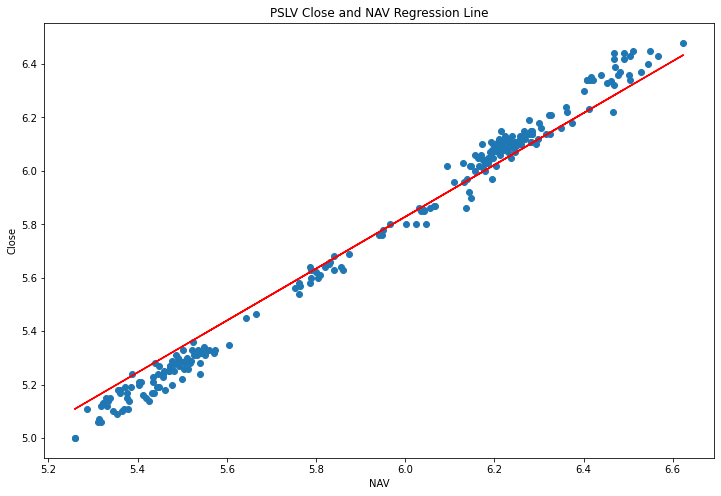

In [17]:
# Determine the hedge ratio
"""
Using statsmodels OLS to find the hedge ratio.
Where the slope of the regression line (line that minimizes the sum of the squared residuals) from OLS is the hedge ratio.
"""
model = OLS(df_1['Close'], df_1['NAV'])
results = model.fit()
hedge_ratio = results.params[0]
print(f'hedge ratio: {hedge_ratio}')
# Plot the regression line
plt.figure(figsize=(12, 8))
plt.scatter(df_1['NAV'], df_1['Close'])
plt.plot(df_1['NAV'], results.fittedvalues, color='r')
plt.title('PSLV Close and NAV Regression Line')
plt.xlabel('NAV')
plt.ylabel('Close')
plt.show()

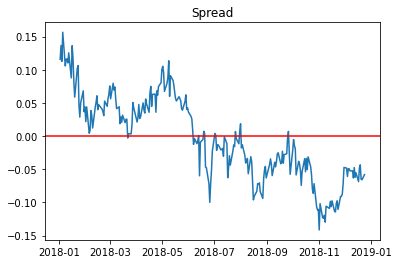

In [18]:
# spread = GLD - hedge_ratio * GDX
spread = df_1['Close'] - hedge_ratio * df_1['NAV']
plt.plot(spread)
plt.title('Spread')
plt.axhline(0, color='red')
plt.show()

Repeating the same steps for the years 2021-2023

In [19]:
df_2 = df['2020-01-01':'2023-01-01']
df_2.head()

,Close,NAV
Date,,
2020-01-02,6.60,6.7038
2020-01-03,6.61,6.7177
2020-01-06,6.65,6.7516
2020-01-07,6.76,6.8457
2020-01-08,6.63,6.7331


In [20]:
# Fill the nan values with the average of the previous day and next day's price
df_2['Close'].fillna(method='ffill', inplace=True)
df_2['NAV'].fillna(method='ffill', inplace=True)
df_2['Close'].fillna(method='bfill', inplace=True)
df_2['NAV'].fillna(method='bfill', inplace=True)

/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_50193/2714760841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Close'].fillna(method='ffill', inplace=True)
/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_50193/2714760841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['NAV'].fillna(method='ffill', inplace=True)
/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_50193/2714760841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

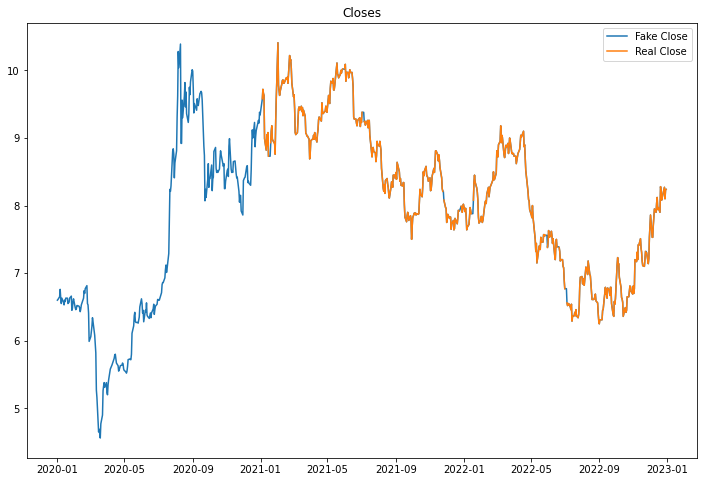

In [21]:
# Plot the df_2 close values against the phys close values for the dates in df_2
plt.figure(figsize=(12, 8))
plt.plot(df_2['Close'], label='Fake Close')
# Plot the close values from the phys df for the same dates in df_1
plt.plot(pslv['Close'].loc['2021-01-01':'2023-01-01'], label='Real Close')
plt.title('Closes')
plt.legend()
plt.show()

In [112]:
#trainset = np.arange(0, 252)
#df_2 = df_2.iloc[trainset, :]  # use only first year of data for training

In [22]:
# coint_t: Cointegration test statistic (t-statistic) for the null hypothesis that the two series are not cointegrated.
# pvalue: MacKinnon's approximate p-value
# crit_value: Critical values for the test statistic at the 1 %, 5 %, and 10 % levels.
coint_t, pvalue, crit_value = coint(
    df_2['Close'], df_2['NAV']
    )
print(f'cointegration test statistic: {coint_t}')
print(f'p-value: {pvalue}')
print(f'critical values: {crit_value}')

cointegration test statistic: -4.47256346826109
p-value: 0.0013581638627606625
critical values: [-3.91073844 -3.34408705 -3.04996981]


hedge ratio: 0.9786937021407696


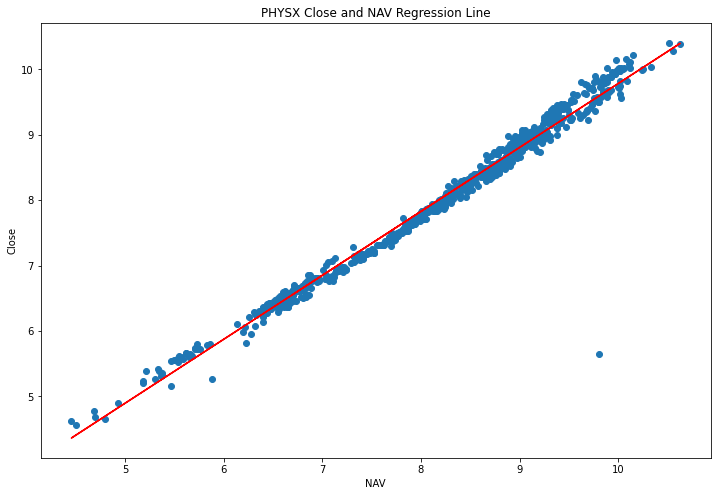

In [23]:
# Determine the hedge ratio
"""
Using statsmodels OLS to find the hedge ratio.
Where the slope of the regression line (line that minimizes the sum of the squared residuals) from OLS is the hedge ratio.
"""
model = OLS(df_2['Close'], df_2['NAV'])
results = model.fit()
hedge_ratio = results.params[0]
print(f'hedge ratio: {hedge_ratio}')
# Plot the regression line
plt.figure(figsize=(12, 8))
plt.scatter(df_2['NAV'], df_2['Close'])
plt.plot(df_2['NAV'], results.fittedvalues, color='r')
plt.title('PHYSX Close and NAV Regression Line')
plt.xlabel('NAV')
plt.ylabel('Close')
plt.show()

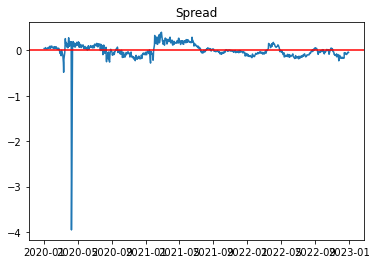

In [24]:
# spread = GLD - hedge_ratio * GDX
spread = df_2['Close'] - hedge_ratio * df_2['NAV']
plt.plot(spread)
plt.title('Spread')
plt.axhline(0, color='red')
plt.show()

Determining the beta between PHYSX and GLD

In [117]:
# Get GLD data from yfinance for the same time period as phys
gld = yf.download('GLD', start='2018-01-01', end='2023-01-01')
gld.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,124.660004,125.180000,124.389999,125.150002,125.150002,11762500
2018-01-03,125.050003,125.089996,124.099998,124.820000,124.820000,7904300
2018-01-04,124.889999,125.849998,124.739998,125.459999,125.459999,7329700
2018-01-05,124.930000,125.480003,124.830002,125.330002,125.330002,5739900
2018-01-08,125.199997,125.320000,124.900002,125.309998,125.309998,3566700


In [122]:
# Calculate the beta between the two assets
covariance = phys['NAV'].pct_change().cov(gld['Adj Close'].pct_change())
variance = gld['Adj Close'].pct_change().var()
beta = covariance / variance
print(beta)

0.9742585592515429


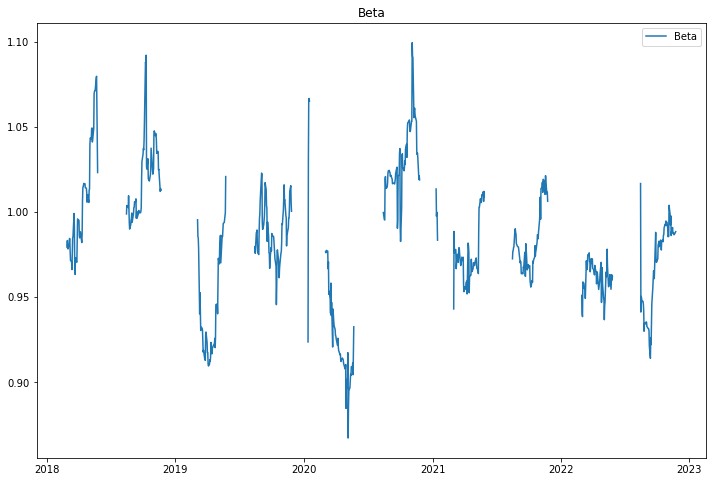

In [125]:
# Plot the beta over time
plt.figure(figsize=(12, 8))
plt.plot((phys['NAV'].pct_change().rolling(30).cov(gld['Adj Close'].pct_change()) / (gld['Adj Close'].pct_change().rolling(30).var())), label='Beta')
plt.title('Beta')
plt.legend()
plt.show()